# Demographic Data Analyzer

##### This is one of the projects developed to claim Data Analysis with Python Certification of freecodecamp web page. Step by step will be showing the results 

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Read data from file
df = pd.read_csv("adult.data.csv")
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [121]:
# How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
race_count = df["race"].value_counts()
print("Number of each race:\n", race_count) 

Number of each race:
 White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


### Representing the last result in a bar chart

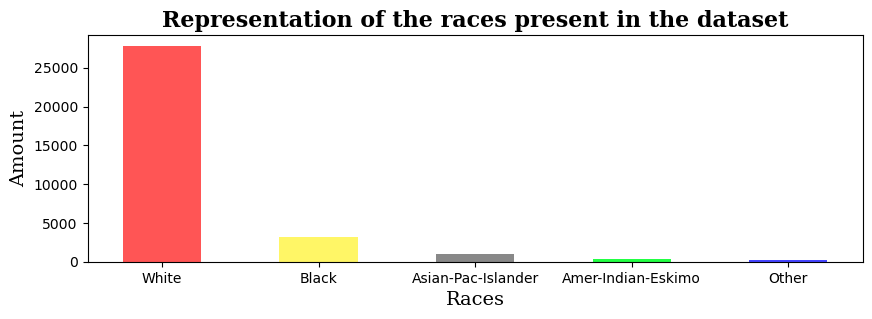

In [130]:
plt.figure(figsize=(10,3), dpi=100)
plt.bar(df["race"].unique(),height=race_count,color=["#FF5555","#FFF666","#888888","#22FF44","#4444FF"],width=0.5)
plt.ylabel("Amount",fontsize=14,fontweight="regular",fontfamily="serif")
plt.xlabel("Races",fontsize=14,fontweight="regular",fontfamily="serif",loc="center")

plt.title("Representation of the races present in the dataset",fontsize=16,fontweight="bold",fontfamily="serif")
plt.show()

In [131]:
# What is the average age of men?
average_age_men = round(df[df.sex=="Male"].age.mean(),1)
print("Average age of men:", average_age_men)

Average age of men: 39.4


In [132]:
# What is the percentage of people who have a Bachelor's degree?
percentage_bachelors = round((df.education.value_counts(normalize=True).Bachelors)*100,1)
print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")


Percentage with Bachelors degrees: 16.4%


In [133]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
# What percentage of people without advanced education make more than 50K?

# with and without `Bachelors`, `Masters`, or `Doctorate`
higher_education = df.loc[df["education"].isin(["Bachelors","Masters","Doctorate"])]
lower_education = df.loc[~df["education"].isin(["Bachelors","Masters","Doctorate"])]

# percentage with salary >50K

higher_education_rich = round(100*(higher_education["salary"]==">50K").sum()/len(higher_education),1)

lower_education_rich = round(100*(lower_education["salary"]==">50K").sum()/len(lower_education),1)
print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")

Percentage with higher education that earn >50K: 46.5%
Percentage without higher education that earn >50K: 17.4%


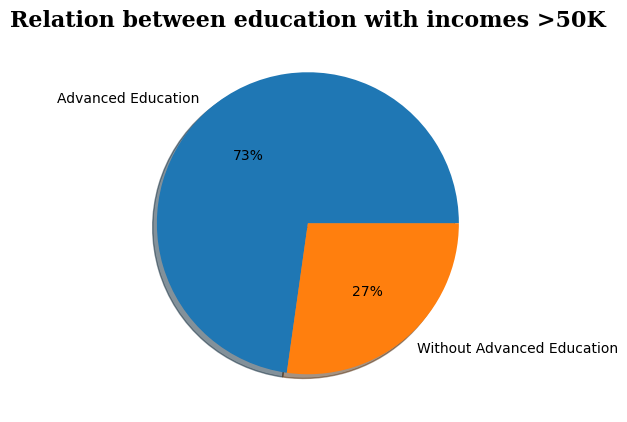

In [134]:
education=[higher_education_rich,lower_education_rich]
data_names=["Advanced Education","Without Advanced Education"]
plt.figure(figsize=(5,5), dpi=100)
plt.pie(education,labels=data_names,shadow=True,autopct="%1.0f%%")
plt.title("Relation between education with incomes >50K",fontsize=16,fontweight="bold",fontfamily="serif")
plt.show()

In [135]:
# What is the minimum number of hours a person works per week (hours-per-week feature)?
min_work_hours = df["hours-per-week"].min()
print(f"Min work time: {min_work_hours} hours/week")


Min work time: 1 hours/week


In [136]:
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
num_min_workers = df.loc[df["hours-per-week"]==min_work_hours]
rich_percentage = round(100*(num_min_workers["salary"]==">50K").sum()/len(num_min_workers),1)
print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")

Percentage of rich among those who work fewest hours: 10.0%


### In the next exercise I will present two different aproaches to solve the task 

In [137]:
# What country has the highest percentage of people that earn >50K?

In [138]:
#The first

highest_earning_country = ""
highest_earning_country_percentage = 0.0
for country,data in df.groupby("native-country"):
     percentage=(data["salary"]==">50K").sum() / data["salary"].count()
     if highest_earning_country_percentage < percentage:
        highest_earning_country_percentage=percentage
        highest_earning_country=country
highest_earning_country_percentage=round(100*highest_earning_country_percentage,1)
print("Country with highest percentage of rich:", highest_earning_country)
print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")

Country with highest percentage of rich: Iran
Highest percentage of rich people in country: 41.9%


In [139]:
#The second way
highest_earning_country = (df
                           .groupby("native-country")["salary"]
                           .value_counts(normalize=True)[:,">50K"]
                           .sort_values(ascending=False)
                           .index[0])

highest_earning_country_percentage = round(100*(df
                           .groupby("native-country")["salary"]
                           .value_counts(normalize=True)[:,">50K"]
                           .sort_values(ascending=False)[0]),1) 
print("Country with highest percentage of rich:", highest_earning_country)
print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")


Country with highest percentage of rich: Iran
Highest percentage of rich people in country: 41.9%


In [140]:
# Identify the most popular occupation for those who earn >50K in India.
top_IN_occupation=df[(df["salary"]==">50K") & (df["native-country"]=="India")]["occupation"].value_counts().keys()[0]
print("Top occupations in India:", top_IN_occupation)

Top occupations in India: Prof-specialty


## Now the project it's ready